In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("discussion.ipynb")

# Discussion 7

### Due Saturday May 21th, 11:59:59PM


## Linear Regression and Feature Engineering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress

pd.set_option('display.max_column', 30)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from discussion import *

## Review of Linear Regresssion


### Introduction

* A linear model posits a linear relationship between an independent variable `x` and a dependent variable `y`.
* Linear Regression is the *best* linear unbiased estimator for a given dataset.
    - 'Best' is measured in terms of *root mean squared error* (RMSE).

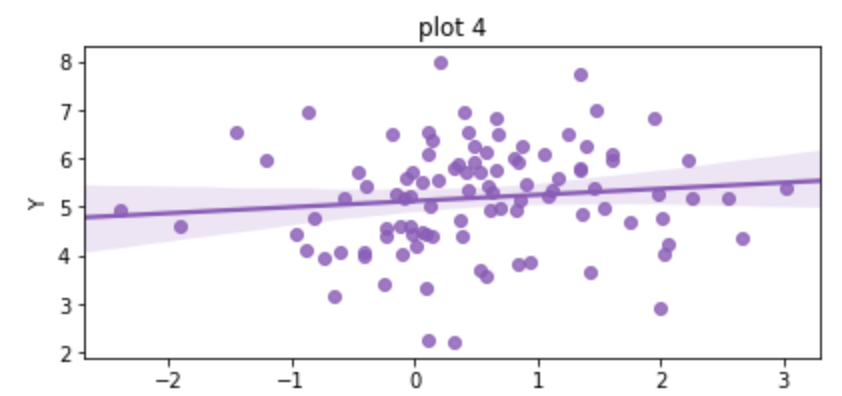


### Terms

* **Correlation Coefficient**: an amount that reflects the strength of linear association between the variables.
    * Values range between -1.0 and 1.0.
* **Slope**: the slope of the regression line.
* **Intercept**: the y-intercept of the regression line.

### Understanding 

* **Interpretation of Regression Line**: the line quantifies how `y` changes with a corresponding change in `x`.
* **Using Regression Line for Prediction**: the line can be used to approximate `y` values, given a *new* `x` value.
* **Residuals**: the errors in the predictions (i.e. the difference between the predicted values and the true values of `y`).

### Evaluating the regression model

While the regression line is the best linear predictor with respect to minimizing RMSE, it is not necessarily true that a *linear* model is the best model for a given prediction problem.

These all relate to questions of *inference*, and therefore the ability of a predictor to generalize:

* If a dataset captures a true linear relationship, then the residuals should show no patterns; there should be no bias in the errors. This can be assessed by viewing the **residual plot**:
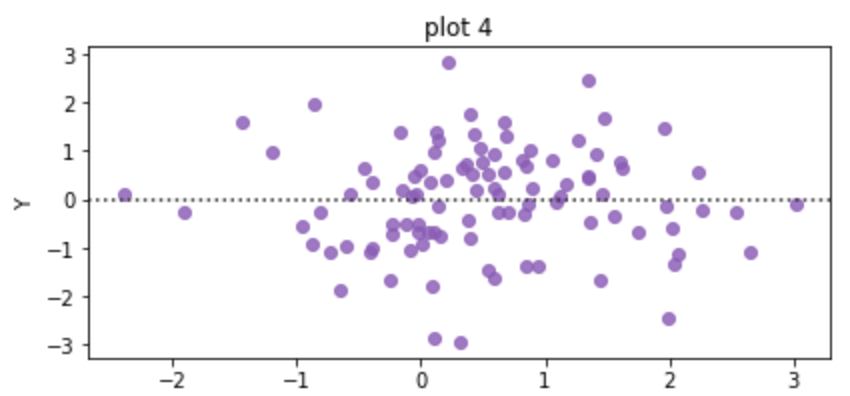
* **Heteroskadasticity**: are there subpopulations with varying levels of variability? The quality of the model may vary across the subpopulations (and thus be unreliable in the future).
* **Multicolinearity**: when fitting a multivariate linear regression model (e.g. a *plane* of best fit), the independent variables must be weakly correlated. Strongly correlated independent variables causes extreme sensitivity of the regression coefficients on the particulars of a given sample.
    - A different sample might drastically change the regression coefficients.

In [6]:
from glob import glob

datasets = {k:pd.read_csv(fp) for k, fp in enumerate(glob('data/dataset_?.csv'))}

### Plot the regression lines for each dataset below

The code below plots 7 datasets, with regression lines fit and plotted over their scatter-plot. The "band" around the regression line is a 95% prediction interval for predictions given by the linear model.

For each plot, try to answer the questions:
* Is a linear model a good choice for the dataset? Why? Why not?
* Is there a (strong) correlation between `X` and `Y`? Or are the variables uncorrelated?
* How good is the Root Mean Squared Error (RMSE) compared to the other datasets?

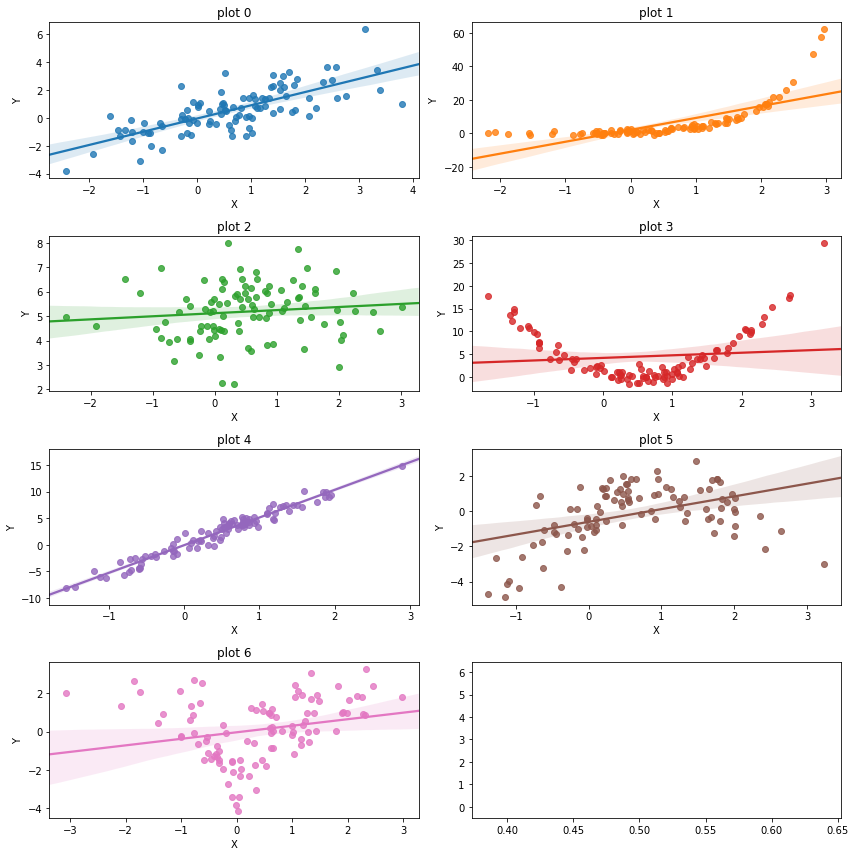

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))

for k, v in datasets.items():
    ax = axes[k//2, k % 2]
    sns.regplot(data=v, x='X', y='Y', ax=ax)
    ax.set_title('plot %s' % k)
    
plt.tight_layout()

### Calculating the RMSE

In [39]:
datasets

{0:            X         Y
 0  -1.062270 -3.098180
 1   1.015286 -1.115720
 2   0.778594  0.172655
 3  -1.204873 -0.987837
 4  -0.172533 -0.017640
 ..       ...       ...
 95  1.537337  0.646349
 96 -1.466886 -0.890916
 97  1.529928  2.497048
 98  1.404825  2.254781
 99  0.479736  1.091062
 
 [100 rows x 2 columns],
 1:            X          Y
 0   2.187910  21.757395
 1   0.328629   1.349689
 2  -0.769271  -0.471370
 3  -2.079671   0.956032
 4   0.968793   3.416463
 ..       ...        ...
 95  0.940607   5.112384
 96 -0.750362   0.460976
 97  2.796225  47.608749
 98  1.737713  11.418746
 99 -0.254129  -0.156853
 
 [100 rows x 2 columns],
 2:            X         Y
 0   0.113289  6.096502
 1  -0.405434  3.969291
 2   0.431266  6.535041
 3  -1.200069  5.956454
 4   0.704906  4.967957
 ..       ...       ...
 95  0.841440  5.926667
 96  1.457943  5.396339
 97 -0.251416  3.422247
 98  1.995807  2.918952
 99  1.163229  5.590274
 
 [100 rows x 2 columns],
 3:            X          Y
 0   1

In [16]:
datasets[7]

KeyError: 7

In [9]:
datasets[0]['X']

0    -1.062270
1     1.015286
2     0.778594
3    -1.204873
4    -0.172533
        ...   
95    1.537337
96   -1.466886
97    1.529928
98    1.404825
99    0.479736
Name: X, Length: 100, dtype: float64

**Question 1**

Calculate the RMSE of each regression line. Put your answer in a function `rmse` that takes in the dictionary `datasets` as an argument and returns a series of RMSEs indexed by plot number (0-6).

Do your computations agree with your guesses from the plot?

Hint: Use `linregress` from `scipy.stats`

In [25]:
len(datasets)

7

In [18]:
datasets[0]

,X,Y
0,-1.062270,-3.098180
1,1.015286,-1.115720
2,0.778594,0.172655
3,-1.204873,-0.987837
4,-0.172533,-0.017640
...,...,...
95,1.537337,0.646349
96,-1.466886,-0.890916
97,1.529928,2.497048
98,1.404825,2.254781


In [34]:
# RMSE
rmse2 = []

for n in np.arange(len(datasets)):
    model = linregress(datasets[n]['X'],datasets[n]['Y'])
    predicted = model.intercept + (model.slope * datasets[n]['X'])
    rmse_calc = np.sqrt(((predicted - datasets[n]['Y'])**2).sum() / datasets[n]['X'].size)
    rmse.append(rmse_calc)



In [35]:
rmse2

[]

In [31]:
pd.Series(rmse)

0    1.074078
1    7.366498
2    1.078983
3    5.455646
4    0.929211
5    1.472267
6    1.568630
dtype: float64

In [8]:
rmse_data = rmse(datasets)

In [10]:
datasets = {k:pd.read_csv('data/dataset_%d.csv' % k) for k in range(7)}
rmse_data = rmse(datasets)

In [11]:
grader.check("q1")

q1 results: All test cases passed!

### Plot the Residuals for each dataset below

The following code plots the *residuals* (errors) for each dataset. Recall that the residual plots help evaluate which dataset is appropriately modeled via a linear model. *If a linear model fits the data well, then the residual plot will have no discernible pattern.*

In each of the following, use the residual plot to evaluate whether a linear model fits the data well. Do these agree with your assessments from looking at the plots of the data above?

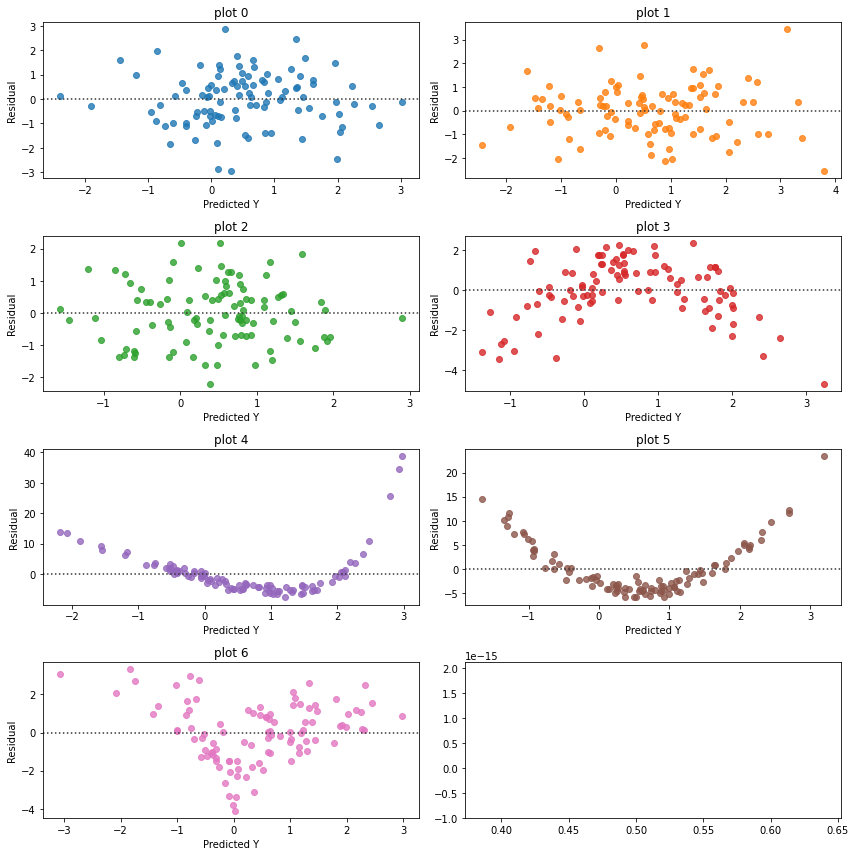

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))

for k, v in datasets.items():
    ax = axes[k//2, k % 2]
    sns.residplot(data=v, x='X', y='Y', ax=ax)
    ax.set_title('plot %s' % k)
    ax.set_xlabel('Predicted Y')
    ax.set_ylabel('Residual')
    
plt.tight_layout()

The table below contains the relevant information about the regression models for each dataset:
* `slope` of the regression line,
* `intercept` of the regression line, 
* `rvalue` (correlation coefficient), 
* `pvalue` is the result of the hypothesis test, with Null Hypothesis: "slope is zero".
* `stderr` is the standard error of the regression 
    - the standard deviation of the sampling distribution of slopes, under resampling the data.

Inspect the table to understand the values in terms of the plots above.

In [13]:
lms = pd.DataFrame()
for k, df in datasets.items():
    lm = linregress(df['X'], df['Y'])
    lms[k] = pd.Series(lm, index=lm._fields)
    
lms

,0,1,2,3,4,5,6
slope,0.126352,9.472078e-01,5.196914e+00,0.721379,7.107159e+00,0.565734,0.341205
intercept,5.120015,-4.241332e-02,-6.103533e-02,-0.611336,2.143024e+00,4.192567,-0.032108
rvalue,0.112739,7.356698e-01,9.774796e-01,0.434271,7.318504e-01,0.109662,0.230882
pvalue,0.264087,2.844506e-18,5.019001e-68,0.000006,5.183159e-18,0.277428,0.020827
stderr,0.112491,8.809600e-02,1.133362e-01,0.151150,6.685046e-01,0.517982,0.145251


### Heteroskedasticity: uneven variance of errors

<img src="imgs/heteroscedasticity.png" width="50%"/>

* If a model has uneven variance of errors, then the quality of the predictions varies based on the input.
* The presence of heteroskedasticity causes concern for the quality of the estimates among certain groups, as well as the models ability to generalize (e.g. how well do the predictions extrapolate?).

To check for heteroskedasticity, **check for a correlation/p-value between the variable $X$ in each dataset and the *square of the residuals* of the regression**. A high correlation (implying a lower p-value) implies that there are uneven variance of errors. This test is roughly called [White's Test](https://en.wikipedia.org/wiki/White_test).

In [14]:
d = {}
for k in range(7):
    data = datasets[k]
    lm = linregress(data['X'], data['Y'])
    m, b = lm.slope, lm.intercept
    preds = m * data['X'] + b
    errors = (preds - data['Y'])**2

    lmr = linregress(data['X'], errors)
    d[k] = lmr.pvalue <= 0.05

pd.Series(d)

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

## Feature Engineering

- Model: $f(X)  -> Y$
- Feature engineering is the process of finding **transformations** that transform data into effective **quantitative variables**
- Good choice of features depend on - relationships being modeled, kind of data (continuous, nominal, ordinal), and the choice of model (linear models, tree based models, neural networks etc.)


- Feature engineering techniques include - standardization, categorical encoding, binning continious data, variable transformations (log, squared etc.), multiplying independent variables etc.

### Categorical Data Feature Engineering

- **Ordinal:**
    - For ordinal variables, we replace the categories with real (mostly integer) values without the loss of ordering.
    - Examples: Grades: (High, Medium, Low) -> (3,2,1), 


- **Nominal:**
    - **One Hot Encoding** is the technique to convert a categorical feature into a set of binary features
    - Very common preprocessing technique used before using many Machine Learning models

### One-Hot Encoding

In the below question, we will use the `adult` dataset to practice one-hot encoding.

In [15]:
adult_df = pd.read_csv('data/adult.csv')
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [34]:
adult_df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

**Question 2**

In this question, we are going to perform one-hot encoding of categorical variables. One-Hot Encoding converts a categorical varaible into 'n' binary variables where 'n' is the number of unique values.

Here is an illustration:

<img src="imgs/ohe_illustration.PNG" width="80%"/>

Each binary feature corresponds to a unique category level, and the corresponding rows having that value will have 1's. After creating these binary features, we can see that one feature wil become redundant (any one column can be determined by the others). So, while using OHE features in modelling, we remove any one of the redundant features.


Given the `adult` dataset and a specified categorical column, return a DataFrame that contains the one-hot encoded features of that variable. The column names should be the unique values of that variable. Note that you should remove the last binary feature which is redundant (corresponding to the last value when you use the `.unique()` method)


- Hint 1: You can use `for` loop for this question or you can use the code provided in Lecture 21 (Code in Lecture 21 that uses `apply` method iterates through rows. A `for` loop that iterates on unique values will be much faster)

**Note:** `sklearn` provides `OneHotEncoder` preprocessing module, but we will not use that directly for this question.

In [22]:
column = 'race'


uniques = adult_df[column].unique()

result_df = pd.DataFrame(columns = uniques)

for n in uniques:
    result_df[n] = (adult_df[column] == n).astype(int)

In [23]:
result_df

,Black,White,Asian-Pac-Islander,Other,Amer-Indian-Eskimo
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
48837,0,1,0,0,0
48838,0,1,0,0,0
48839,0,1,0,0,0
48840,0,1,0,0,0


In [24]:
ohe_out = onehot_encoding(pd.read_csv('data/adult.csv'), col='relationship')
isinstance(ohe_out, pd.DataFrame) == True
   
    

True

In [33]:
ohe_out.shape #== (48842, 5) == True

(48842, 6)

In [26]:
set(ohe_out.columns) == {'Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife'} == True

False

In [29]:
ohe_out = onehot_encoding(adult_df, col='relationship')
ohe_out

,Own-child,Husband,Not-in-family,Unmarried,Wife,Other-relative
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
48837,0,0,0,0,1,0
48838,0,1,0,0,0,0
48839,0,0,0,1,0,0
48840,1,0,0,0,0,0


In [30]:
grader.check("q2")

q2 results:
    q2 - 1 result:
        Test case passed!

    q2 - 2 result:
        Trying:
            ohe_out.shape == (48842, 5)
        Expecting:
            True
        **********************************************************************
        Line 1, in q2 1
        Failed example:
            ohe_out.shape == (48842, 5)
        Expected:
            True
        Got:
            False

    q2 - 2 message: doctest

    q2 - 3 result:
        Trying:
            set(ohe_out.columns) == {'Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife'}
        Expecting:
            True
        **********************************************************************
        Line 1, in q2 2
        Failed example:
            set(ohe_out.columns) == {'Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife'}
        Expected:
            True
        Got:
            False

    q2 - 3 message: doctest: column names

    q2 - 4 result:
        Test case passed!

    q2 - 5 result:
        Test case passed!

## Congratulations! You're done!

* Submit your `.py` file to Gradescope. Note that you only need to submit the `.py` file; this notebook should not be uploaded. Make sure that all of your work is in the `.py` file and not here by running the doctests: `python -m doctest discussion.py`.

---

To double-check your work, the cell below will rerun all of the autograder tests.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()